<a href="https://colab.research.google.com/github/shiissaa/MAT421/blob/main/ModuleB(part1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**17.1 Interpolation Problem Statement**

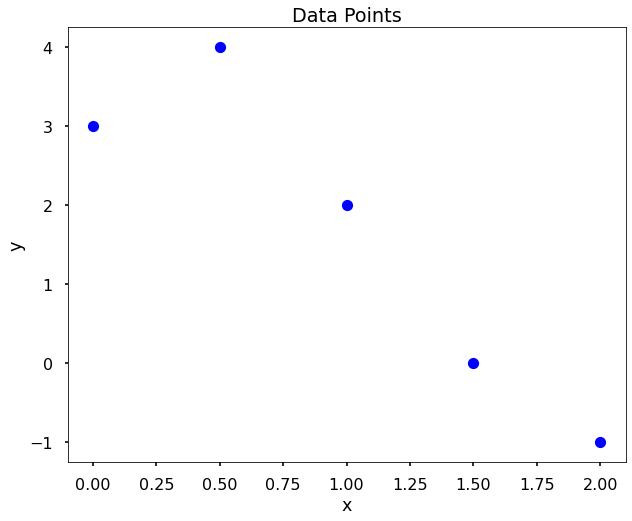

In [40]:
import matplotlib.pyplot as pltSta

x = [0, 0.5, 1, 1.5, 2]
y = [3, 4, 2, 0, -1]

pltSta.style.use('seaborn-poster')
pltSta.figure(figsize = (10, 8))
pltSta.plot(x, y, 'bo')
pltSta.title('Data Points')
pltSta.xlabel('x')
pltSta.ylabel('y')
pltSta.show()

We have one data set containing indepdendent values, x<sub>i</sub>, and another data set containing dependent values, y<sub>i</sub>, where i ∈ ℕ. We would like to find an estimatation function that can be used to output new approximated dependent values based on new independent value inputs. To do this, the estimation function needs to go through our data values. This is known as the process of interpolating function values. 

Unlike regression, we do not need an underlying data model, especially with reliable data points. 

**17.2 Linear Interpolation**

In linear interpolation, the estimated point of interest is assumed to lie on the line formed between the nearest points to the left and right. Assume, without loss of generality, that the data points of interest are in ascending order (e.g. [1, 2, 3]), and let x be a data point between two known data points. Then we can use a function to find the linear interpolation at x.

Find the linear interpolation at x = 1.25 based on the data [0, 0.5, 1, 1.5, 2], y = [3, 4, 2, 0, -1]. Add a plot for visualization.

1.0


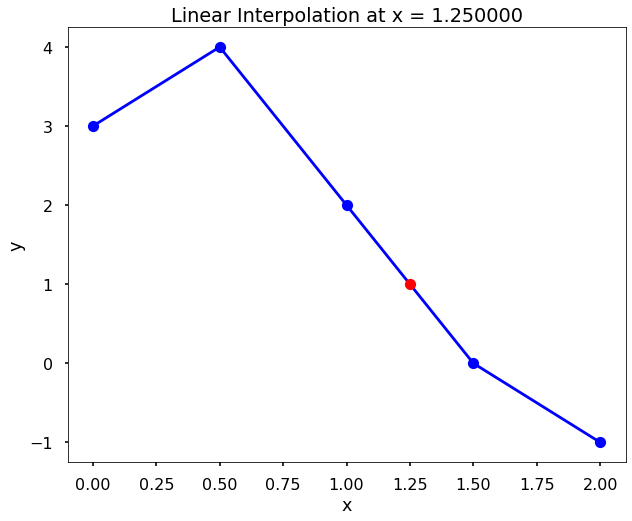

In [32]:
# scipy.interpolate.interp1d interpolates a 1-D function.
# It takes two arrays to approximate a function f: y = f(x).
# It returns a function that uses interpolation to find the data point's value
from scipy.interpolate import interp1d
# Import library for plotting data points
import matplotlib.pyplot as pltLin

# Desired data point used to find value at point
data_point = 1.25

x = [0, 0.5, 1, 1.5, 2]
y = [3, 4, 2, 0, -1]

f = interp1d(x, y)
y_estimate = f(data_point)
print(y_estimate)

# Visualization
pltLin.style.use('seaborn-poster')
pltLin.figure(figsize = (10, 8))
pltLin.plot(x, y, '-ob')
pltLin.plot(data_point, y_estimate, '-ro')
pltLin.title('Linear Interpolation at x = %f' %data_point)
pltLin.xlabel('x')
pltLin.ylabel('y')
pltLin.show()

**17.3 Cubic Spline Interpolation**

In cubic spline interpolation, the interpolating function is a set of piecewise cubic polynomial functions connected by already known data points. 

S<sub>i</sub>(x) = a<sub>i</sub>x<sup>3</sup> + b<sub>i</sub>x<sup>2</sup> + c<sub>i</sub>x + d<sub>i</sub>

With this, we can find more than one data point at one time when the desired data points lie between different points.
For n points, there are n-1 cubic functions to find, and each cubic function requires four coefficients (a<sub>i</sub>, b<sub>i</sub>, c<sub>i</sub>, d<sub>i</sub>).


Therefore, there are a total of 4(n-1) independent equations to find all the coefficients. To determine the coefficients, we can write out the constrains explicitly as a system of lienar equations with 4(n-1) unknowns.

Find the cubic spline interpolation of the data set x = [0, 0.5, 1, 1.5, 2], y = [3, 4, 2, 0, -1]. Add a plot for visualization.

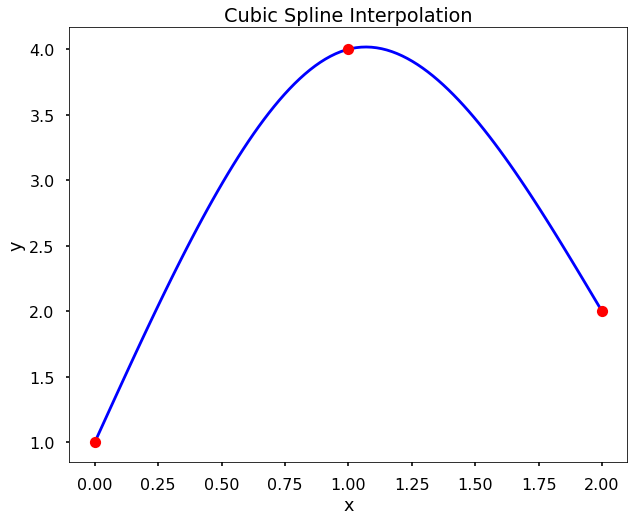

In [42]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as pltCub

x = [0, 1, 2]
y = [1, 4, 2]

f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

# Visualization
pltCub.style.use('seaborn-poster')
pltCub.figure(figsize = (10, 8))
pltCub.plot(x_new, y_new, 'b')
pltCub.plot(x, y, 'ro')
pltCub.title('Cubic Spline Interpolation')
pltCub.xlabel('x')
pltCub.ylabel('y')
pltCub.show()